In [1]:
import warnings
warnings.simplefilter(action='ignore')

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### 1. 以矩阵运算仿真神经网络

#### 1.1 y = relu((X * W) + b)

In [3]:
X = tf.Variable([[0.4, 0.2, 0.4]])
W = tf.Variable([
    [-0.5, -0.2],
    [-0.3, 0.4],
    [-0.5, 0.2]
])
b = tf.Variable([[0.1, 0.2]])
result = tf.matmul(X, W) + b
y = tf.nn.relu(result)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print('result:', sess.run(result))
    print('y:', sess.run(y))

result: [[-0.35999998  0.28      ]]
y: [[0.   0.28]]


#### 1.2 y = sigmoid((X * W) + b)

In [4]:
X = tf.Variable([[0.4, 0.2, 0.4]])
W = tf.Variable([
    [-0.5, -0.2],
    [-0.3, 0.4],
    [-0.5, 0.2]
])
b = tf.Variable([[0.1, 0.2]])
result = tf.matmul(X, W) + b
y = tf.nn.sigmoid(result)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print('result:', sess.run(result))
    print('y:', sess.run(y))

result: [[-0.35999998  0.28      ]]
y: [[0.41095957 0.5695462 ]]


#### 1.3 以正态分布的随机数生成权重与偏差的初始值

In [5]:
X = tf.Variable([[0.4, 0.2, 0.4]])
W = tf.Variable(tf.random_normal([3, 2]))
b = tf.Variable(tf.random_normal([1, 2]))
result = tf.matmul(X, W) + b
y = tf.nn.relu(result)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    w_, b_, y_ = sess.run((W, b, y))
    print('W:', w_)
    print('b:', b_)
    print('y:', y_)

W: [[-2.075261    0.4418381 ]
 [-0.4115933   0.14172077]
 [ 1.1376783   0.5455061 ]]
b: [[-0.7646976  0.7440777]]
y: [[0.        1.1673596]]


#### 1.4 正态分布的随机数 tf.random_normal

In [6]:
normal_array = tf.random_normal([1000])
with tf.Session() as sess:
    normal_data = sess.run(normal_array)

print('normal data length:', len(normal_data))
print(normal_data[:30])

normal data length: 1000
[-1.9249927  -1.4921683  -0.98833495 -0.9466415   1.0175036   0.7307655
 -1.0541631   0.813238    0.36450565  0.4377187  -0.69136196 -1.051614
  0.44473353  0.11826661 -0.93143207  1.0840364   1.1706591   0.8179217
  0.0826885   0.7686695   0.27023697  1.2993698   0.61665887  0.3910737
 -0.6657248  -0.87913203  1.6416286   0.34995267  0.7268337  -0.62023956]


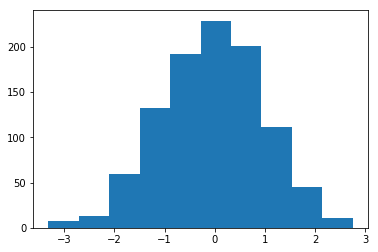

In [7]:
plt.hist(normal_data)
plt.show()

### 2. 以 placeholder 传入 X 值

#### 2.1 以 placeholder 传入 1*3 的二维数组

In [8]:
X = tf.placeholder('float', [None, 3])
W = tf.Variable(tf.random_normal([3, 2]))
b = tf.Variable(tf.random_normal([1, 2]))
result = tf.matmul(X, W) + b
y = tf.nn.relu(result)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    x_array = np.array([[0.4, 0.2, 0.4]])
    w_, b_, y_ = sess.run((W, b, y), feed_dict={X: x_array})
    print('W:', w_)
    print('b:', b_)
    print('y:', y_)

W: [[ 1.5918082  -0.9832617 ]
 [-0.02635845 -0.20186134]
 [ 0.23869179 -0.29970053]]
b: [[-1.3642514 -1.2061498]]
y: [[0. 0.]]


#### 2.2 以 placeholder 传入 3*3 的二维数组

In [9]:
X = tf.placeholder('float', [None, 3])
W = tf.Variable(tf.random_normal([3, 2]))
b = tf.Variable(tf.random_normal([1, 2]))
result = tf.matmul(X, W) + b
y = tf.nn.sigmoid(result)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    x_array = np.array([[0.4, 0.2, 0.4],
                        [0.3, 0.4, 0.5],
                        [0.3, -0.4, 0.5]])
    w_, b_, y_ = sess.run((W, b, y), feed_dict={X: x_array})
    print('W:', w_)
    print('b:', b_)
    print('y:', y_)

W: [[-0.11468825  1.9673066 ]
 [-0.08138695 -0.48802418]
 [ 0.96089125 -0.6681382 ]]
b: [[ 1.014417  -1.1596572]]
y: [[0.79193366 0.32353035]
 [0.8065741  0.2499753 ]
 [0.81652975 0.32996914]]


### 3. 创建 layer 函数以矩阵运算仿真神经网络

#### 3.1 定义 layer 函数

In [10]:
def layer(output_dim, input_dim, inputs, activation=None):
    W = tf.Variable(tf.random_normal([input_dim, output_dim]))
    b = tf.Variable(tf.random_normal([1, output_dim]))
    result = tf.matmul(inputs, W) + b
    
    if activation is None:
        outputs = result
    else:
        outputs = activation(result)
    
    return outputs

In [11]:
X = tf.placeholder('float', [None, 4])
y = layer(output_dim=3, input_dim=4, inputs=X, activation=tf.nn.relu)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    x_array = np.array([[0.4, 0.2, 0.4, 0.1],
                        [0.3, 0.4, 0.5, 0.3],
                        [0.3, -0.4, 0.5, 0.2]])
    x_, y_ = sess.run((X, y), feed_dict={X: x_array})
    print('X:', x_)
    print('y:', y_)

X: [[ 0.4  0.2  0.4  0.1]
 [ 0.3  0.4  0.5  0.3]
 [ 0.3 -0.4  0.5  0.2]]
y: [[1.4922328 0.        1.8698667]
 [1.2684783 0.        1.922584 ]
 [1.9266617 0.        1.3748204]]


#### 3.2 使用 layer 函数建立3层神经网络

In [12]:
X = tf.placeholder('float', [None, 4])
h = layer(output_dim=3, input_dim=4, inputs=X, activation=tf.nn.relu)
y = layer(output_dim=2, input_dim=3, inputs=h)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    x_array = np.array([[0.4, 0.2, 0.4, 0.5]])
    x_, h_, y_ = sess.run((X, h, y), feed_dict={X: x_array})
    print('X:', x_)
    print('h:', h_)
    print('y:', y_)

X: [[0.4 0.2 0.4 0.5]]
h: [[2.3432775  2.0743177  0.61050224]]
y: [[1.5198518  0.38232744]]


### 4. 创建 layer_debug 函数显示权重与偏差

In [13]:
def layer_debug(output_dim, input_dim, inputs, activation=None):
    W = tf.Variable(tf.random_normal([input_dim, output_dim]))
    b = tf.Variable(tf.random_normal([1, output_dim]))
    result = tf.matmul(inputs, W) + b
    
    if activation is None:
        outputs = result
    else:
        outputs = activation(result)
    
    return outputs, W, b

In [14]:
X = tf.placeholder('float', [None, 4])
h, W1, b1 = layer_debug(output_dim=3, input_dim=4, inputs=X, activation=tf.nn.relu)
y, W2, b2 = layer_debug(output_dim=2, input_dim=3, inputs=h)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    x_array = np.array([[0.4, 0.2, 0.4, 0.5]])
    x_, h_, y_, w1_, b1_, w2_, b2_ = sess.run((X, h, y, W1, b1, W2, b2), feed_dict={X: x_array})
    print('X:', x_)
    print('h:', h_)
    print('W1:', w1_)
    print('b1:', b1_)
    print('y:', y_)
    print('W2:', w2_)
    print('b2:', b2_)

X: [[0.4 0.2 0.4 0.5]]
h: [[0.9840085 0.        0.       ]]
W1: [[-0.93856984 -0.5609033  -0.68849075]
 [ 0.4549042  -0.6213276   0.42857125]
 [-0.8169483   1.1261041   0.26323652]
 [ 0.21705349 -1.0245273   1.1000092 ]]
b1: [[ 1.4867082 -1.0011966 -0.766666 ]]
y: [[-0.22585669 -2.174033  ]]
W2: [[-0.53245366 -2.2362213 ]
 [ 0.68009377  1.047862  ]
 [ 0.23251943 -1.2658181 ]]
b2: [[0.2980822  0.02642769]]
